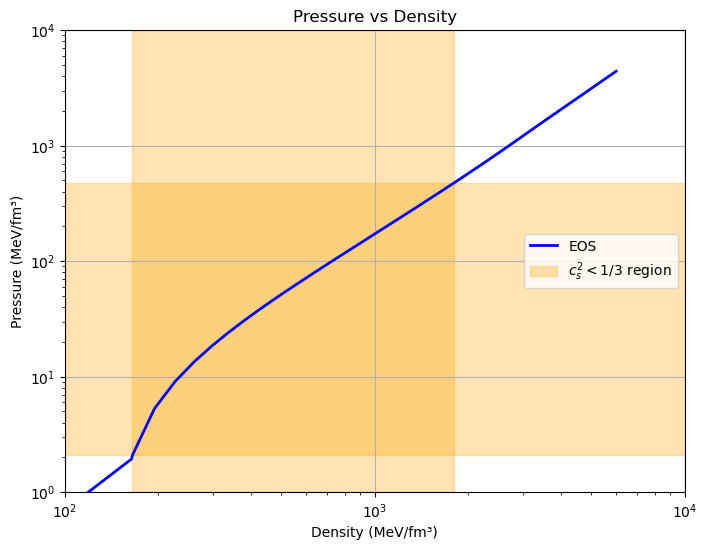

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from TOVsolver.unit import g_cm_3, dyn_cm_2, km, Msun, MeV, fm

# Load the EOS data
EOS = np.loadtxt("EOS_FULL_GROK_with_cs2.txt")

# Extract columns
pressure = EOS[:, 0]/1.6022e33  # Pressure in dyn/cm²
density = EOS[:, 1] /1.7827e12  # Density in g/cm³
cs2 = EOS[:, 2]       # Speed of sound squared

# Define the density range


# Define the density and pressure ranges
density_min = 2.948e14/1.7827e12
density_max = 3.217247e+15/1.7827e12  # Corrected upper limit based on data
pressure_min = 3.332576e33/1.6022e33  # dyn/cm²
pressure_max = 7.631221e35/1.6022e33  # dyn/cm²

# Create a mask for points where cs2 < 1/3 and within specified ranges
mask = (density >= density_min) & \
       (density <= density_max) & \
       (cs2 < 1/3) & \
       (pressure >= pressure_min) & \
       (pressure <= pressure_max) & \
       np.isfinite(cs2)

# Find the density bounds where conditions are met
if np.any(mask):
    density_cs2_min = density[mask].min()
    density_cs2_max = density[mask].max()
else:
    density_cs2_min = density_min
    density_cs2_max = density_min  # Default to min if no points satisfy
# Create the pressure-density plot
plt.figure(figsize=(8, 6))
plt.plot(density, pressure, 'b-', lw=2, label='EOS')

# Shade the region where cs2 < 1/3
# 
# Shade the rectangular region considering both density and pressure spans
if np.any(mask):
    plt.axvspan(density_cs2_min, density_cs2_max, color='orange', alpha=0.3)
    plt.axhspan(pressure_min, pressure_max, color='orange', alpha=0.3, 
                label=r'$c_s^2 < 1/3$ region')

plt.xlabel('Density (MeV/fm³)')
plt.ylabel('Pressure (MeV/fm³)')
plt.title('Pressure vs Density')
plt.xscale("log")
plt.yscale("log")
plt.xlim([10**2,10**4])
plt.ylim([10**0,10**4])
plt.grid(True)
plt.legend()
plt.show()